In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:
# path= 'data/liver/'
path="C:\\Workplace\\C++\\d2ome_v2\\v2\\v2\\bin\\Release\\" 
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv") and "_compar" not in p and "_Compar" not in p:
        proteinlist.append(p)  

In [41]:
data=pd.DataFrame()
for  p in proteinlist: 
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')    
    data=pd.concat([data,d])
print(data.shape)
print(data.columns)

(48009, 38)
Index(['proteinName', 'peptideSeq', 'charge', 'old_Rsquared', 'new_Rsquared',
       'NDP', 'rateconstant', 'sigma', 'Abundance', 'MassToCharge', 'RMSE',
       'selected_A1A0_count', ' selected_A2A0_count', ' selected_A2A1_count',
       'improved_timePoints', 'new_k', 'I0_percentatediffI0_percentatediff',
       'selected_io_t', 'i0', 'I0_asymptote', 'new_rmse', 'lowerci_old',
       'upperci_old', 'sigma_old', 'lowerci_new', 'upperci_new', 'sigma_new',
       'old_pearson', 'new_pearson', 'Protein', 'protien', 'peptide',
       'rsquared', 'mo', 'io_e', 'io_a1a0', 'io_a2a0', 'io_a2a1'],
      dtype='object')


In [42]:
# data=data[data.NDP >=6]
# data=data[data.old_Rsquared>0.97]
# data=data.reset_index(drop=True)
# print(data.shape)

data=data[data.NDP >=6]
data=data[data.old_Rsquared<0.25]
data=data.reset_index(drop=True)
print(data.shape)

(6350, 38)


In [43]:
data.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,new_pearson,Protein,protien,peptide,rsquared,mo,io_e,io_a1a0,io_a2a0,io_a2a1
0,1433B_MOUSE,DSTLImQLLR,2,-0.132288,0.291445,12.0,0.10303,0.026401,4.965206e+07,603.33154,...,0.830570,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433B_MOUSE,SVFYYEILNSPEK,2,-0.502257,0.589116,12.0,0.1201,0.062119,1.999508e+07,794.89832,...,0.816219,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1433E_MOUSE,QMVETELK,2,-1.336010,-0.754463,12.0,0.01346,0.008729,3.001270e+08,489.25223,...,0.154248,1433E_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1433E_MOUSE,KEAAENSLVAYK,3,-3.450050,0.775584,12.0,0.21953,0.081955,1.863658e+07,441.56985,...,0.901272,1433E_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1433E_MOUSE,AASDIAMTELPPTHPIR,3,0.118769,0.165274,12.0,0.00618,0.003892,3.735520e+08,607.31720,...,0.453481,1433E_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
selected=pd.DataFrame()
for p in data.proteinName.unique():
    d=pd.read_csv(os.path.join(path,"_compare"+p+".csv"))
    selected=pd.concat([selected,d])


print(selected.shape)
selected=selected.dropna()
print(selected.shape)

(4453, 11)
(3688, 11)


In [45]:
selected.head()

,Protein,Peptide,charge,time,RSS,theta,min_rss_decoy,diff,abs_diff,perc_diff,abs_perc_diff
0,1433B_MOUSE,IEAELQDIcNDVLELLDK,2,24,0.000609,0.91,0.000856,-0.011802,0.011802,-0.198403,0.198403
1,1433B_MOUSE,TAFDEAIAELDTLNEESYK,3,31,0.004091,0.59,0.006199,-0.009862,0.009862,-0.212066,0.212066
0,1433E_MOUSE,HLIPAANTGESK,2,16,0.000647,0.81,0.00508,0.003401,0.003401,0.020732,0.020732
1,1433E_MOUSE,LIccDILDVLDK,2,9,0.000236,0.95,0.002464,0.032121,0.032121,0.128232,0.128232
2,1433E_MOUSE,AAFDDAIAELDTLSEESYK,2,24,0.004831,0.63,0.003855,0.003214,0.003214,0.075668,0.075668


In [46]:
merged=data.merge(selected,left_on=["proteinName","peptideSeq","charge"], right_on=["Protein","Peptide","charge"])[["time","theta","RSS","perc_diff","min_rss_decoy","abs_perc_diff"]]
merged=merged.dropna()

In [47]:
merged[(merged.abs_perc_diff>=0.5)& (merged.theta>0) & (merged.min_rss_decoy>0) ]

,time,theta,RSS,perc_diff,min_rss_decoy,abs_perc_diff
14,24,0.56,0.003013,-0.55162,0.003301,0.55162
15,3,0.8,0.000542,0.626616,0.016764,0.626616
19,21,0.89,0.006765,0.674903,0.001849,0.674903
25,9,0.58,0.003436,0.783658,0.018227,0.783658
26,16,0.49,0.001716,-0.735544,0.006428,0.735544
...,...,...,...,...,...,...
1062,21,0.69,0.003193,-0.829845,0.001324,0.829845
1070,21,0.69,0.005396,-0.783118,0.004623,0.783118
1090,13,0.57,0.003045,0.670346,0.018597,0.670346
1104,3,0.49,0.001882,0.554211,0.004881,0.554211


C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

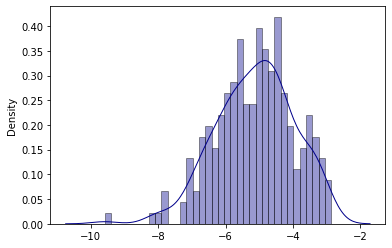

In [48]:
import math
sns.distplot([math.log(float(x)) for x in 
             merged[(merged.abs_perc_diff>=0.15)& (merged.theta>0) ].min_rss_decoy.astype(float)
             ], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# sns.distplot(merged.min_rss_decoy, hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1})

C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perc_diff', ylabel='Density'>

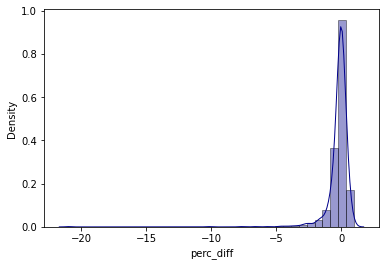

In [49]:
sns.distplot(merged.perc_diff, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

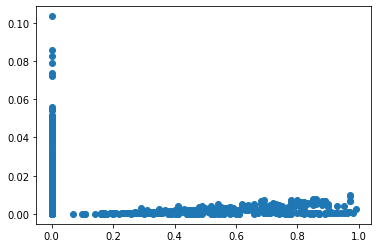

In [11]:
plt.scatter(merged.theta,merged.RSS)

In [12]:
temp=selected.groupby(by="time")["Peptide"].count().reset_index()
# temp.plot(kind='bar',x="time",y="Peptide",width=0.75,rot=0,figsize=(9,6))

C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RSS', ylabel='Density'>

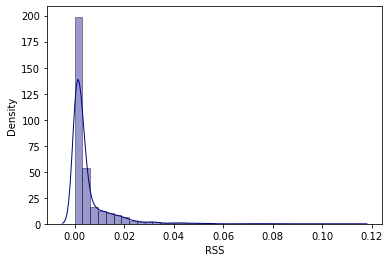

In [13]:
sns.distplot(selected.RSS, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})